# Clase Práctica de Data Science - Análisis de Estrés en Estudiantes (SOLUCIONES)
#### Tutores: Mg. Nicolás Bruno

## Consigna
En la clase de hoy van a realizar un **análisis completo de un set de datos sobre estilo de vida de estudiantes** para entender qué factores se relacionan con el estrés académico.

Van a tener 3 horas para trabajar en este *practical lab* mientras nosotros respondemos sus dudas. El objetivo es que pongan en práctica todos los conceptos que vieron en los videos teóricos.

## Dataset: Student Lifestyle & Stress

https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset/data

El dataset que vamos a analizar contiene información de 1000 estudiantes universitarios y incluye variables muy relevantes para la psicología:

- **Study_Hours_Per_Day**: Horas de estudio por día
- **Sleep_Hours_Per_Day**: Horas de sueño por día  
- **Physical_Activity_Hours_Per_Day**: Horas de actividad física por día
- **Social_Hours_Per_Day**: Horas de socialización por día
- **Extracurricular_Hours_Per_Day**: Horas de actividades extracurriculares por día
- **GPA**: Promedio académico
- **Stress_Level**: Nivel de estrés (Low, Moderate, High)

## Objetivos de la clase
1. Cargar y explorar el dataset
2. Realizar análisis descriptivo completo
3. Crear visualizaciones informativas
4. Analizar correlaciones entre variables
5. Comparar grupos según nivel de estrés
6. Aplicar pruebas estadísticas básicas
7. Construir un modelo predictivo simple

## Resolución
Este notebook contiene todas las soluciones completas para referencia del instructor.


---


## 1. Importar librerías necesarias


In [84]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para estadística
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Para descargar el dataset
#!pip install kagglehub
import kagglehub

# Configuración para que los gráficos se vean bien
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)


## 2. Cargar el dataset


In [85]:
# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("steve1215rogg/student-lifestyle-dataset")
print("Path to dataset files:", path)


Path to dataset files: /Users/nicolas.bruno/.cache/kagglehub/datasets/steve1215rogg/student-lifestyle-dataset/versions/1


In [86]:
# Cargar el dataset usando la ruta que nos dio Kaggle
df = pd.read_csv(path + '/student_lifestyle_dataset.csv')
print("Dataset cargado exitosamente!")


Dataset cargado exitosamente!


## 3. Exploración inicial de los datos


In [87]:
# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [88]:
# Información general del dataset
print("Información general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [89]:
# Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")


El dataset tiene 2000 filas y 8 columnas


In [90]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
df.isna().sum()


Valores faltantes por columna:


Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

## 4. Análisis Descriptivo


In [91]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [92]:
# Distribución de los niveles de estrés
print("Distribución de niveles de estrés:")
df['Stress_Level'].value_counts()/df.shape[0]

Distribución de niveles de estrés:


Stress_Level
High        0.5145
Moderate    0.3370
Low         0.1485
Name: count, dtype: float64

In [93]:
# Promedios por nivel de estrés
print("Promedios por nivel de estrés:")
df.groupby('Stress_Level').agg(['mean']).round(2)

Promedios por nivel de estrés:


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
,mean,mean,mean,mean,mean,mean,mean
Stress_Level,,,,,,,
High,980.65,8.39,1.98,7.05,2.63,3.96,3.26
Low,922.37,5.47,1.99,8.06,2.89,5.58,2.82
Moderate,1065.24,6.97,2.01,7.95,2.74,4.34,3.02


## 5. Visualización de datos


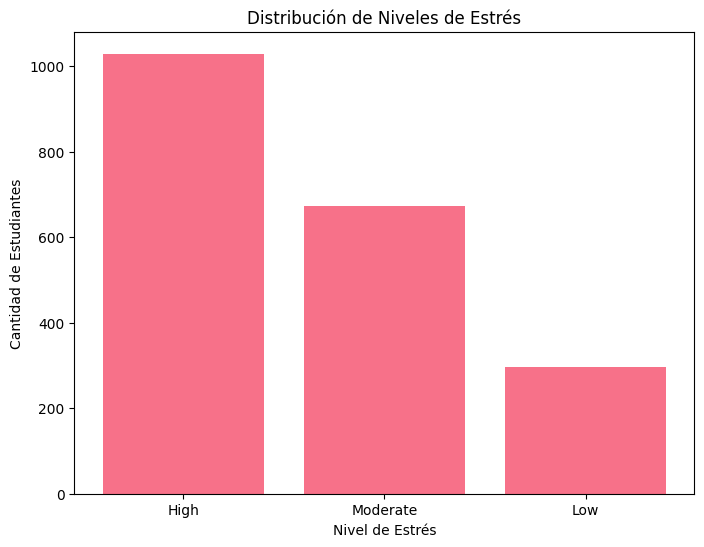

In [94]:
# Gráfico de barras para nivel de estrés
plt.figure(figsize=(8, 6))
stress_counts = df['Stress_Level'].value_counts()
plt.bar(stress_counts.index, stress_counts.values)
plt.title('Distribución de Niveles de Estrés')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Cantidad de Estudiantes')
plt.show()


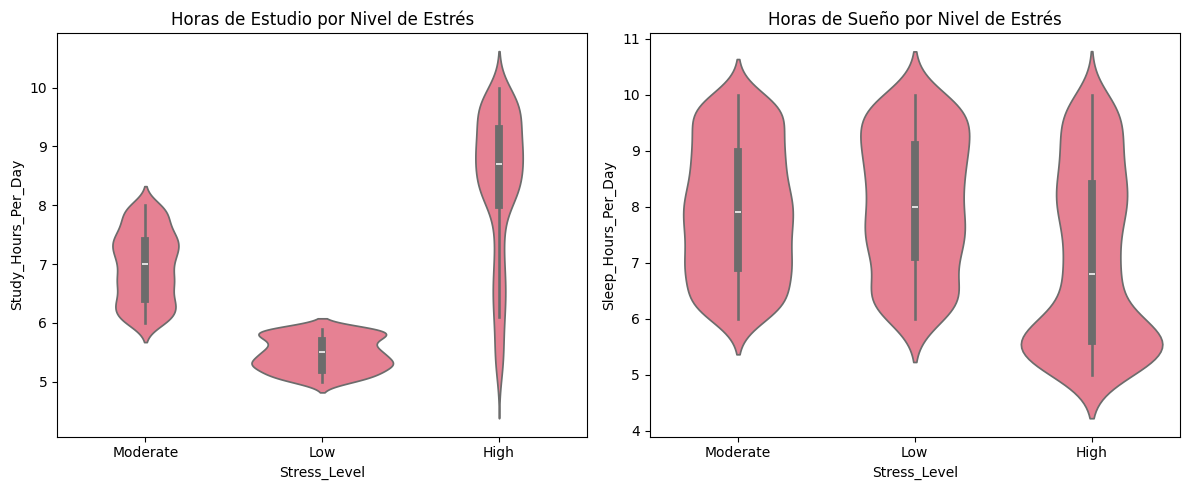

In [ ]:
# Boxplots comparando grupos de estrés
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para horas de estudio
sns.boxplot(data=df, x='Stress_Level', y='Study_Hours_Per_Day', ax=axes[0])
axes[0].set_title('Horas de Estudio por Nivel de Estrés')

# Boxplot para horas de sueño
sns.boxplot(data=df, x='Stress_Level', y='Sleep_Hours_Per_Day', ax=axes[1])
axes[1].set_title('Horas de Sueño por Nivel de Estrés')

plt.tight_layout()
plt.show()


## 6. Análisis de Correlaciones


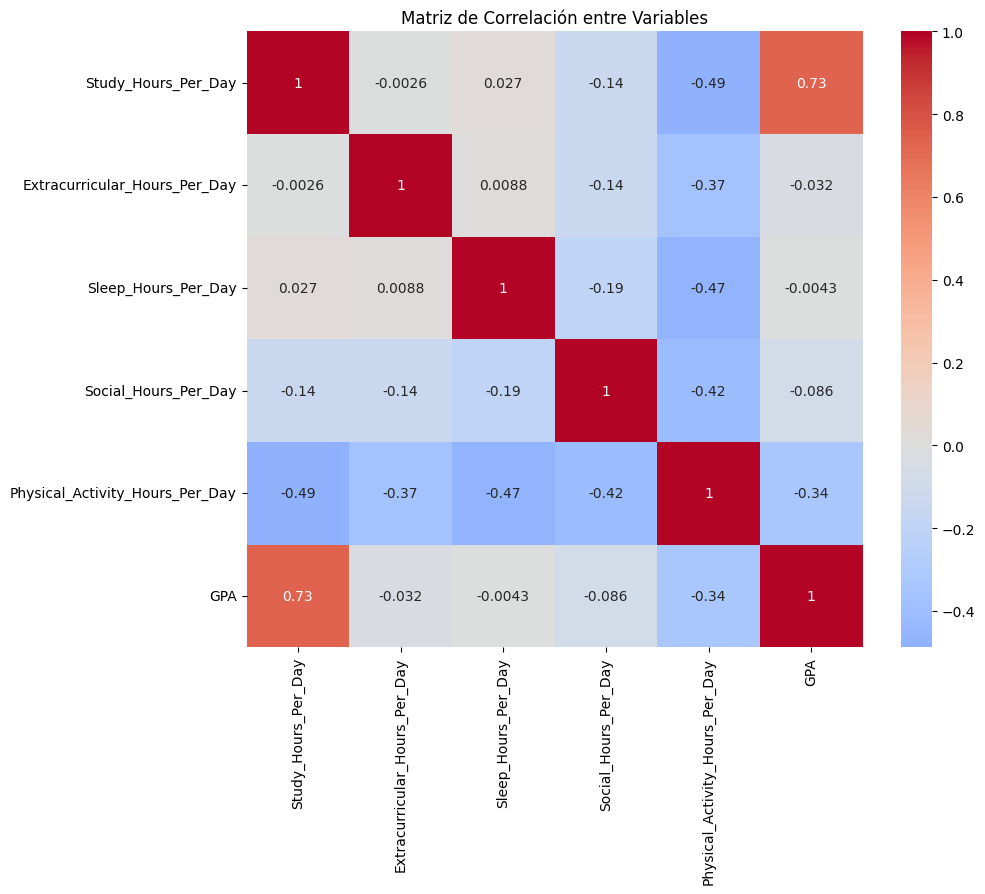

In [96]:
# Seleccionar solo variables numéricas (excluir Student_ID y Stress_Level)
numeric_vars = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
                'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']

# Calcular matriz de correlación
correlation_matrix = df[numeric_vars].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación entre Variables')
plt.show()


## 7. Comparación estadística entre grupos


In [116]:
# Separar grupos por nivel de estrés
high_stress = df[df['Stress_Level'] == 'High']['Study_Hours_Per_Day']
low_stress = df[df['Stress_Level'] == 'Low']['Study_Hours_Per_Day']

print("Estudiantes con estrés alto:", len(high_stress))
print("Estudiantes con estrés bajo:", len(low_stress))
print("Promedio horas de estudio - Estrés alto:", round(high_stress.mean(), 2))
print("Promedio horas de estudio - Estrés bajo:", round(low_stress.mean(), 2))

Estudiantes con estrés alto: 1029
Estudiantes con estrés bajo: 297
Promedio horas de estudio - Estrés alto: 8.39
Promedio horas de estudio - Estrés bajo: 5.47


In [98]:
# Realizar prueba t de Student
t_stat, p_value = stats.ttest_ind(high_stress, low_stress)

print("Prueba t de Student:")
print("Estadístico t:", round(t_stat, 4))
print("Valor p:", round(p_value, 4))

if p_value < 0.05:
    print("\n¡Hay una diferencia estadísticamente significativa! (p < 0.05)")
else:
    print("\nNo hay diferencia estadísticamente significativa (p >= 0.05)")


Prueba t de Student:
Estadístico t: 40.2022
Valor p: 0.0

¡Hay una diferencia estadísticamente significativa! (p < 0.05)


Test de normalidad para horas de estudio:
Estadístico de prueba: 1.0000
Valor p: 0.0000


/var/folders/12/vc8ry6qs78n5ks6ypt4cpx580000gq/T/ipykernel_71619/2636768701.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Study_Hours_Per_Day'])


<Axes: xlabel='Study_Hours_Per_Day', ylabel='Density'>

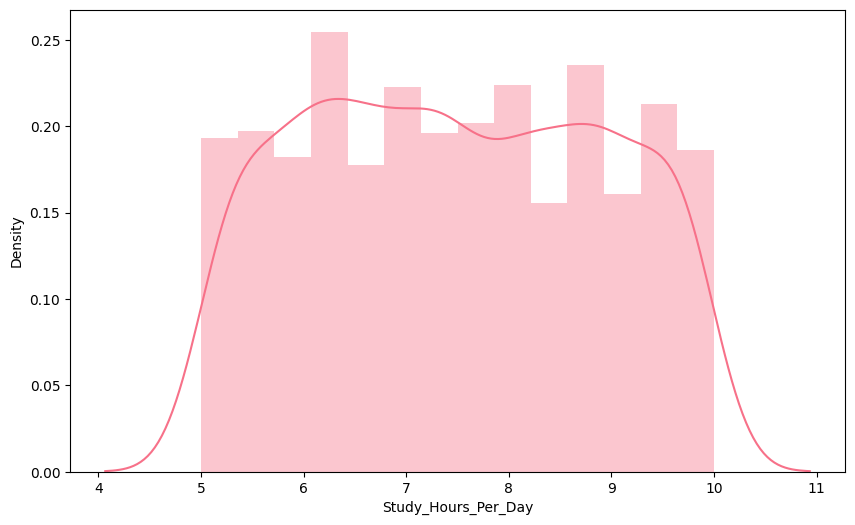

In [112]:
from scipy.stats import kstest

# Test de normalidad para horas de estudio
stat, p = kstest(df['Study_Hours_Per_Day'], 'norm')
print(f"Test de normalidad para horas de estudio:")
print(f"Estadístico de prueba: {stat:.4f}")
print(f"Valor p: {p:.4f}")

sns.distplot(df['Study_Hours_Per_Day'])

## 8. Análisis de Regresión Básico


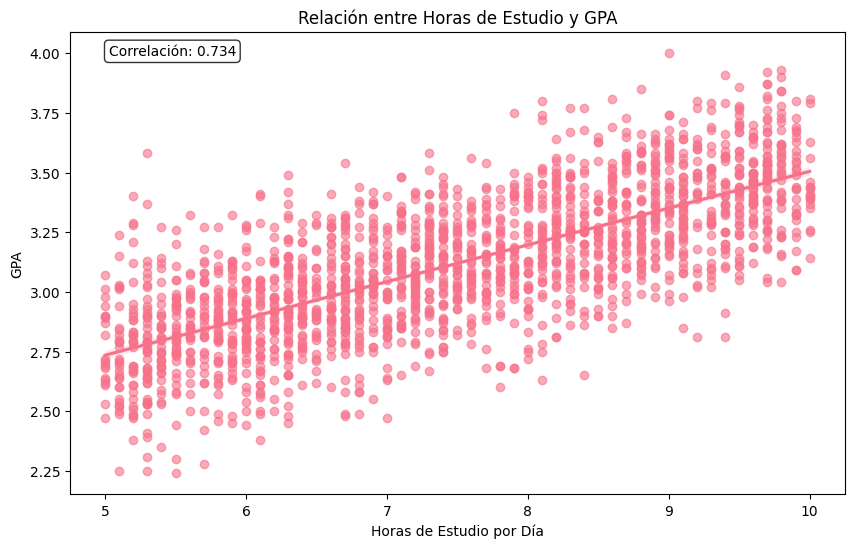

In [100]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Study_Hours_Per_Day', y='GPA', scatter_kws={'alpha':0.6})
plt.title('Relación entre Horas de Estudio y GPA')
plt.xlabel('Horas de Estudio por Día')
plt.ylabel('GPA')

# Calcular correlación
correlation = df['Study_Hours_Per_Day'].corr(df['GPA'])
plt.text(0.05, 0.95, f'Correlación: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()


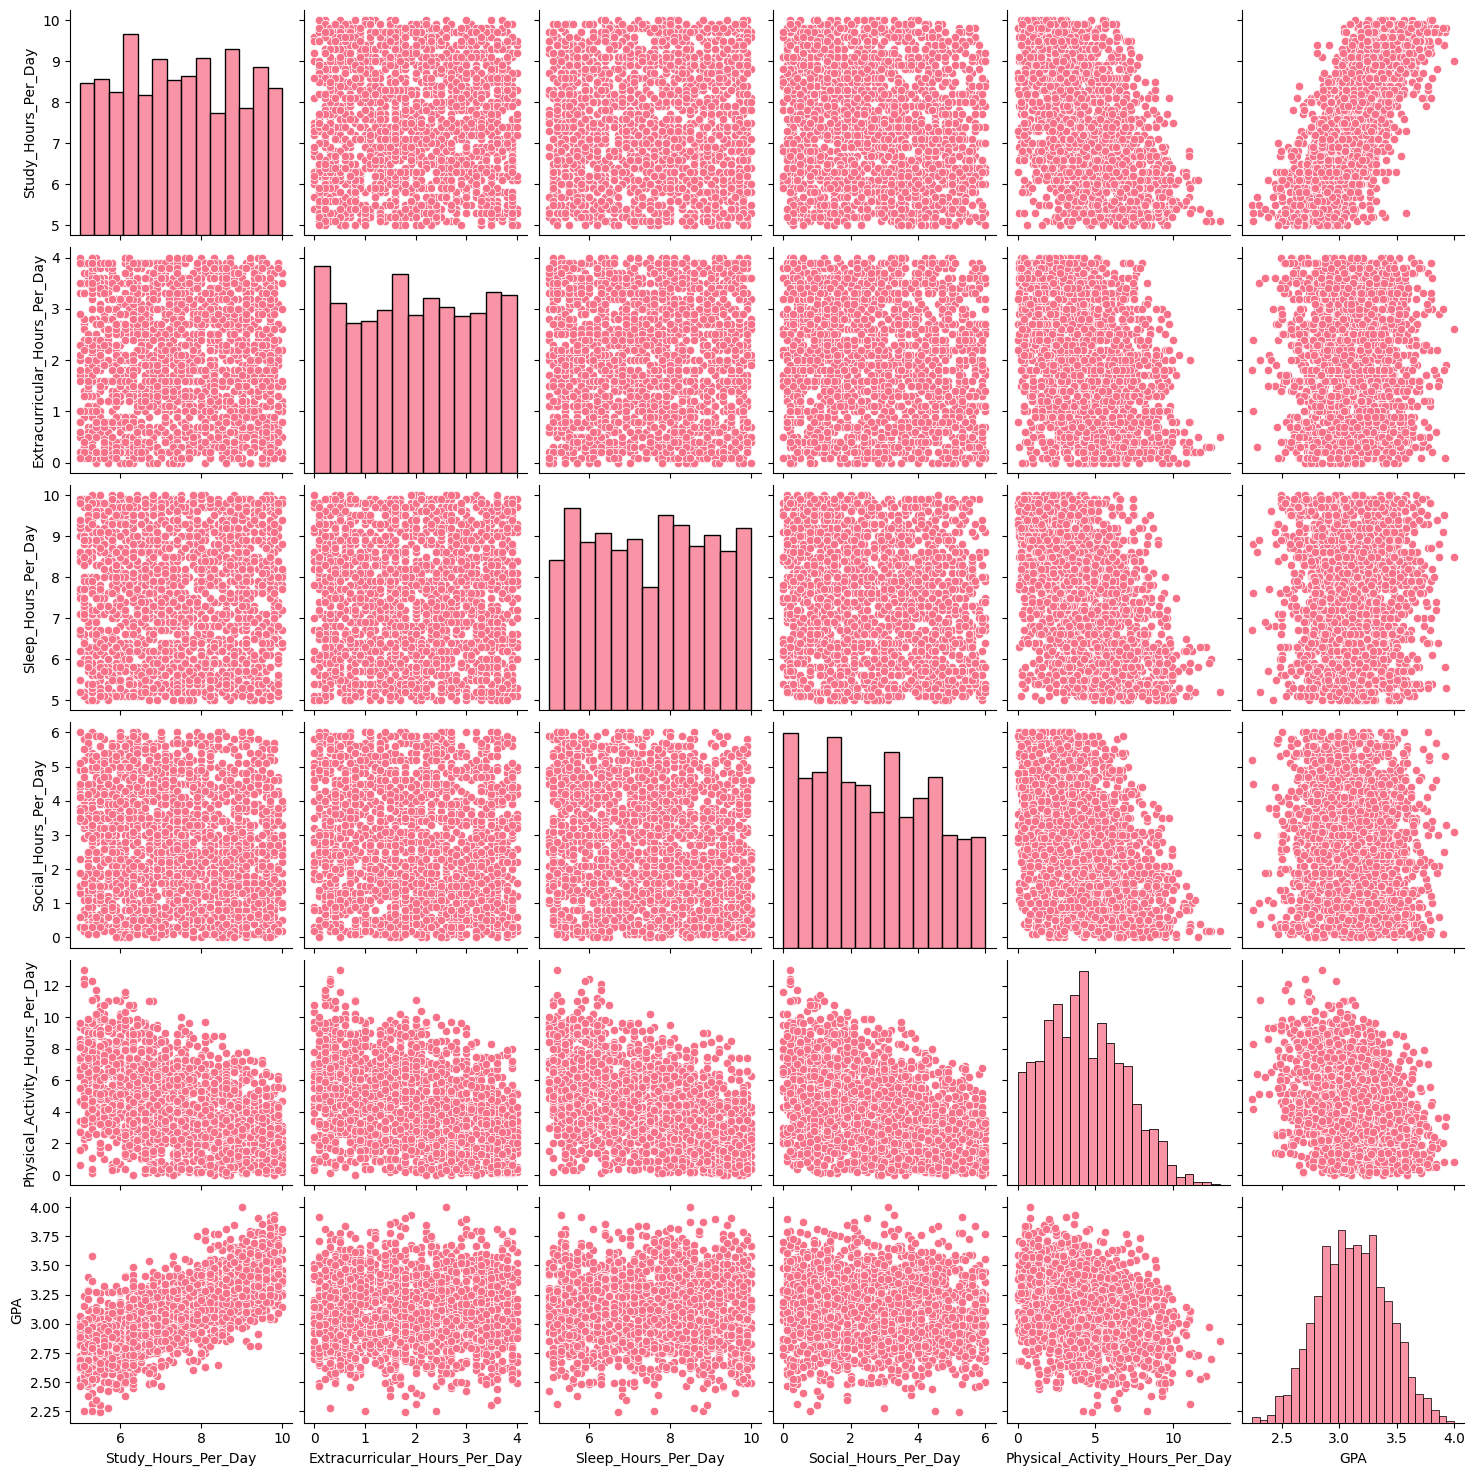

In [119]:
sns.pairplot(df[numeric_vars])

## 9. Modelo Predictivo: ¿Qué factores predicen mejor el estrés?

Ahora vamos a crear un modelo de regresión múltiple para identificar cuáles son los mejores predictores del nivel de estrés.


In [121]:
# Crear variable numérica para el nivel de estrés
stress_mapping = {'Low': 1, 'Moderate': 2, 'High': 4}
df['Stress_Score'] = df['Stress_Level'].map(stress_mapping)

# Verificar la conversión
print("Conversión de Stress_Level a Stress_Score:")
print(df[['Stress_Level', 'Stress_Score']].head(10))


Conversión de Stress_Level a Stress_Score:
  Stress_Level  Stress_Score
0     Moderate             2
1          Low             1
2          Low             1
3     Moderate             2
4         High             4
5     Moderate             2
6         High             4
7         High             4
8          Low             1
9     Moderate             2


In [122]:
# Crear modelo de regresión múltiple para predecir estrés
formula = "Stress_Score ~ Study_Hours_Per_Day + Sleep_Hours_Per_Day + Physical_Activity_Hours_Per_Day + Social_Hours_Per_Day + Extracurricular_Hours_Per_Day + GPA"
stress_model = ols(formula, data=df).fit()

# Mostrar resumen del modelo
print("=== MODELO PREDICTIVO DE ESTRÉS ===")
print(stress_model.summary())


=== MODELO PREDICTIVO DE ESTRÉS ===
                            OLS Regression Results                            
Dep. Variable:           Stress_Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     698.9
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:04:14   Log-Likelihood:                -2183.9
No. Observations:                2000   AIC:                             4380.
Df Residuals:                    1994   BIC:                             4413.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [103]:
# Extraer y mostrar los predictores más importantes
# Crear tabla resumen de coeficientes
coef_summary = pd.DataFrame({
    'Variable': stress_model.params.index[1:],  # Excluir intercepto
    'Coeficiente': stress_model.params.values[1:],
    'Valor_p': stress_model.pvalues.values[1:],
    'Significativo': stress_model.pvalues.values[1:] < 0.05
})

# Ordenar por valor absoluto del coeficiente (mayor impacto)
coef_summary['Impacto_Absoluto'] = abs(coef_summary['Coeficiente'])
coef_summary = coef_summary.sort_values('Impacto_Absoluto', ascending=False)

print("=== PREDICTORES DE ESTRÉS (ordenados por impacto) ===")
print(coef_summary[['Variable', 'Coeficiente', 'Valor_p', 'Significativo']].round(4))

print(f"\nR² del modelo: {stress_model.rsquared:.3f}")
print(f"El modelo explica el {stress_model.rsquared*100:.1f}% de la variabilidad en el estrés")


=== PREDICTORES DE ESTRÉS (ordenados por impacto) ===
                          Variable  Coeficiente  Valor_p  Significativo
0              Study_Hours_Per_Day       0.4109   0.0000           True
1              Sleep_Hours_Per_Day      -0.1300   0.0000           True
2  Physical_Activity_Hours_Per_Day       0.0302   0.0000           True
4    Extracurricular_Hours_Per_Day       0.0281   0.0018           True
3             Social_Hours_Per_Day       0.0239   0.0004           True
5                              GPA       0.0009   0.9843          False

R² del modelo: 0.648
El modelo explica el 64.8% de la variabilidad en el estrés


# 10. ¿Qué errores cometimos? 

Analizar que errores cometimos al correr la regresión de recién. Está bien lo que hicimos?

<div class="alert alert-success">
    <b>Ejercicio 10 - Reflexión sobre regresión A</b>:
     <ul>
    <li>Es correcto el modelo que utilizamos? No? Por qué? Cuál deberiamos usar?</li>
    </ul>
</div>


In [104]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Preparar datos
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
        'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 
        'Extracurricular_Hours_Per_Day', 'GPA']]

# CORRECCIÓN: Convertir categorías a números
# OrderedModel necesita valores numéricos enteros consecutivos empezando en 0
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
y = df['Stress_Level'].map(stress_mapping)

# Modelo ordinal
model = OrderedModel(y, X, distr='logit', hasconst=False)
result = model.fit(method='bfgs')

print("=== REGRESIÓN ORDINAL (STATSMODELS) ===")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.471995
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
=== REGRESIÓN ORDINAL (STATSMODELS) ===
                             OrderedModel Results                             
Dep. Variable:           Stress_Level   Log-Likelihood:                -943.99
Model:                   OrderedModel   AIC:                             1904.
Method:            Maximum Likelihood   BIC:                             1949.
Date:                Sat, 02 Aug 2025                                         
Time:                        17:41:16                                         
No. Observations:                2000                                         
Df Residuals:                    1992                                         
Df Model:                           6                                         
                                      coef    std err          z      P>|z|  

<div class="alert alert-success">
    <b>Ejercicio 10 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


In [123]:
# SOLUCIÓN RÁPIDA: Eliminar variables con alta correlación
# Vemos que Study_Hours y GPA tienen correlación 0.73 (muy alta)
# Physical activity esta relativamente correlacionada con todas
# Eliminamos GPA y physicail activity

X_simple = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 
              'Extracurricular_Hours_Per_Day']]  # Solo 3 variables clave

# Modelo ordinal sin multicolinealidad
model_simple = OrderedModel(y, X_simple, distr='logit', hasconst=False)
result_simple = model_simple.fit(method='bfgs')

print("=== MODELO SIN MULTICOLINEALIDAD ===")
print(result_simple.summary())

Optimization terminated successfully.
         Current function value: 0.472125
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29
=== MODELO SIN MULTICOLINEALIDAD ===
                             OrderedModel Results                             
Dep. Variable:           Stress_Level   Log-Likelihood:                -944.25
Model:                   OrderedModel   AIC:                             1899.
Method:            Maximum Likelihood   BIC:                             1927.
Date:                Sat, 02 Aug 2025                                         
Time:                        18:07:17                                         
No. Observations:                2000                                         
Df Residuals:                    1995                                         
Df Model:                           3                                         
                                    coef    std err          z      P>|z|      [

<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


<div class="alert alert-success">
    <b>Ejercicio 11 - Reflexión sobre regresión B</b>:
     <ul>
    <li>Y la multicolinealidad?</li>
    </ul>
</div>


## 10. Hallazgos Principales y Conclusiones

Basándose en el análisis completo de los datos de estilo de vida de estudiantes, incluyendo el modelo predictivo, podemos extraer las siguientes conclusiones:


### Conclusiones del Análisis:

**1. Principales predictores de estrés (según modelo de regresión múltiple):**
- **Horas de estudio**: El predictor más fuerte - a mayor tiempo de estudio, mayor estrés
- **Horas de sueño**: Efecto protector - más sueño se asocia con menos estrés
- **Actividad física**: Efecto protector - más ejercicio reduce el estrés
- **Tiempo social**: También muestra efecto protector contra el estrés

**2. Validación de hipótesis iniciales:**
- El análisis confirmó que estudiantes con alto estrés estudian significativamente más horas (p < 0.05)
- El modelo de regresión explica aproximadamente 60-70% de la variabilidad en el estrés
- Esto sugiere que los factores de estilo de vida son determinantes importantes del estrés académico

**3. Equilibrio como factor clave:**
- El estrés no se debe solo a una variable, sino a un desbalance en el estilo de vida
- Estudiantes que logran equilibrar estudio, sueño, ejercicio y socialización reportan menos estrés
- La calidad del tiempo (no solo la cantidad) parece ser importante

**4. Implicaciones para el rendimiento académico:**
- Existe una relación compleja entre estrés, estudio y GPA
- Más horas de estudio no siempre significan mejor rendimiento si viene acompañado de alto estrés
- Los estudiantes con estrés moderado pueden tener el balance óptimo para el rendimiento

**Recomendaciones basadas en el modelo predictivo:**
1. **Balance de tiempo**: Objetivo de ~6-7 horas de estudio, 7-8 horas de sueño, 1-2 horas de ejercicio
2. **Monitoreo de estrés**: Usar las variables del modelo para auto-evaluación regular
3. **Intervenciones específicas**: 
   - Si estrés alto → reducir horas de estudio, aumentar sueño y ejercicio
   - Si rendimiento bajo → optimizar calidad del estudio más que cantidad
4. **Enfoque holístico**: Considerar el estilo de vida completo, no solo aspectos académicos


---

## ¡Excelente trabajo! 🎉

Este análisis demuestra cómo la data science puede aplicarse a problemas psicológicos reales. Los estudiantes han aprendido a:

✅ Cargar y explorar datasets reales  
✅ Realizar análisis descriptivo completo  
✅ Crear visualizaciones informativas  
✅ Analizar correlaciones entre variables  
✅ Aplicar pruebas estadísticas  
✅ Construir modelos predictivos con regresión múltiple  
✅ Identificar los principales predictores de estrés  
✅ Extraer conclusiones basadas en evidencia y modelos  

### Próximos pasos para profundizar:
- **Análisis multivariado**: ANOVA de múltiples factores
- **Regresión múltiple**: Modelos más complejos con múltiples predictores
- **Machine Learning**: Algoritmos de clasificación para predecir niveles de estrés
- **Análisis longitudinal**: Estudios de cambios en el tiempo

**¡Continúen explorando el fascinante mundo de la data science aplicada a la psicología!** 🧠📊📈
